## Pymaceuticals Analysis

* Ramicane and Capomulin are the only 2 drugs that shows a decrease in tumor size, with Ramicane being the most effective. 
* Survival rates were the highest with both Ramicane and Capomulin.
* As a whole, SEM seems to increase with the number of treatment days for both tumor response and metastic spread.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
mouse_clinical_trial_complete = pd.merge(mouse_drug_data, clinical_trial_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_clinical_trial_complete.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
mean_tumor_volume = mouse_clinical_trial_complete.groupby(['Drug', 'Timepoint']).agg({'Tumor Volume (mm3)': 'mean'}).reset_index()
mean_tumor_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
SE= mouse_clinical_trial_complete.groupby(['Drug', 'Timepoint']).sem()
SE1 = SE[['Tumor Volume (mm3)']]
SE1.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
mtv_shaped=mean_tumor_volume.pivot(index='Timepoint', columns='Drug')
mtv_shaped.head()

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

In [5]:
#Adding SE for error bars
mean_tumor_volume_with_se = pd.merge(mean_tumor_volume, SE1, how="left", left_on=["Drug", "Timepoint"], right_on=["Drug", "Timepoint"])
mean_tumor_volume_with_se.head()
cap_df= mean_tumor_volume_with_se.loc[mean_tumor_volume_with_se['Drug']=='Capomulin']
x_cap = cap_df['Timepoint']
y_cap = cap_df['Tumor Volume (mm3)_x']
se_cap = cap_df['Tumor Volume (mm3)_y']
inf_df= mean_tumor_volume_with_se.loc[mean_tumor_volume_with_se['Drug']=='Infubinol']
x_inf = inf_df['Timepoint']
y_inf = inf_df['Tumor Volume (mm3)_x']
se_inf = inf_df['Tumor Volume (mm3)_y']
ket_df= mean_tumor_volume_with_se.loc[mean_tumor_volume_with_se['Drug']=='Ketapril']
x_ket = ket_df['Timepoint']
y_ket = ket_df['Tumor Volume (mm3)_x']
se_ket = ket_df['Tumor Volume (mm3)_y']
pla_df= mean_tumor_volume_with_se.loc[mean_tumor_volume_with_se['Drug']=='Placebo']
x_pla = pla_df['Timepoint']
y_pla = pla_df['Tumor Volume (mm3)_x']
se_pla = pla_df['Tumor Volume (mm3)_y']

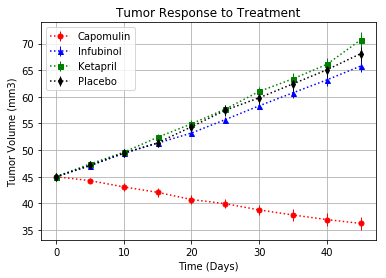

In [6]:
plt.grid()
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.errorbar(x_cap, y_cap, se_cap, color="red", label="Capomulin", marker="o", markersize = 5, linestyle= 'dotted', elinewidth= 1)
plt.errorbar(x_inf, y_inf, se_inf, color="blue", label="Infubinol", marker="^", markersize = 5, linestyle= 'dotted', elinewidth= 1)
plt.errorbar(x_ket, y_ket, se_ket, color="green", label="Ketapril", marker="s", markersize = 5, linestyle= 'dotted', elinewidth= 1)
plt.errorbar(x_pla, y_pla, se_pla, color="black", label="Placebo", marker="d", markersize = 5, linestyle= 'dotted', elinewidth= 1)
plt.legend( loc="upper left")
plt.savefig("../Images/TumorResponsetoTreatment.png")
plt.show()

## Metastatic Response to Treatment

In [7]:
mean_met = mouse_clinical_trial_complete.groupby(['Drug', 'Timepoint']).agg({'Metastatic Sites': 'mean'}).reset_index()
mean_met.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
SE_met= mouse_clinical_trial_complete.groupby(['Drug', 'Timepoint']).sem()
SE1_met = SE_met[['Metastatic Sites']]
SE1_met.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
mm_shaped=mean_met.pivot(index='Timepoint', columns='Drug')
mm_shaped.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

In [10]:
#Adding SE for error bars
mean_met_with_se = pd.merge(mean_met, SE1_met, how="left", left_on=["Drug", "Timepoint"], right_on=["Drug", "Timepoint"])
mean_met_with_se.head()
cap_met_df= mean_met_with_se.loc[mean_met_with_se['Drug']=='Capomulin']
x_cap_met = cap_met_df['Timepoint']
y_cap_met = cap_met_df['Metastatic Sites_x']
se_cap_met = cap_met_df['Metastatic Sites_y']
inf_met_df= mean_met_with_se.loc[mean_met_with_se['Drug']=='Infubinol']
x_inf_met = inf_met_df['Timepoint']
y_inf_met = inf_met_df['Metastatic Sites_x']
se_inf_met = inf_met_df['Metastatic Sites_y']
ket_met_df= mean_met_with_se.loc[mean_met_with_se['Drug']=='Ketapril']
x_ket_met = ket_met_df['Timepoint']
y_ket_met = ket_met_df['Metastatic Sites_x']
se_ket_met = ket_met_df['Metastatic Sites_y']
pla_met_df= mean_met_with_se.loc[mean_met_with_se['Drug']=='Placebo']
x_pla_met = pla_met_df['Timepoint']
y_pla_met = pla_met_df['Metastatic Sites_x']
se_pla_met = pla_met_df['Metastatic Sites_y']

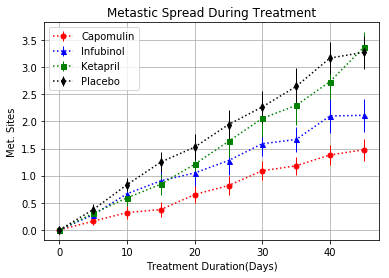

In [11]:
plt.grid()
plt.title("Metastic Spread During Treatment")
plt.xlabel("Treatment Duration(Days)")
plt.ylabel("Met. Sites")
plt.errorbar(x_cap_met, y_cap_met, se_cap_met, color="red", label="Capomulin", marker="o", markersize = 5, linestyle= 'dotted', elinewidth= 1)
plt.errorbar(x_inf_met, y_inf_met, se_inf_met, color="blue", label="Infubinol", marker="^", markersize = 5, linestyle= 'dotted', elinewidth= 1)
plt.errorbar(x_ket_met, y_ket_met, se_ket_met, color="green", label="Ketapril", marker="s", markersize = 5, linestyle= 'dotted', elinewidth= 1)
plt.errorbar(x_pla_met, y_pla_met, se_pla_met, color="black", label="Placebo", marker="d", markersize = 5, linestyle= 'dotted', elinewidth= 1)
plt.legend(loc="upper left")
plt.savefig("../Images/MetasticSpreadDuringTreatment.png")
plt.show()

## Survival Rates

In [12]:
mouse_count = mouse_clinical_trial_complete.groupby(['Drug', 'Timepoint']).agg({'Mouse ID': 'count'}).reset_index()
mouse_count.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
mouse_count_shaped=mouse_count.pivot(index='Timepoint', columns='Drug')
mouse_count_shaped.head()

Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

In [15]:
mouse_survival_cap= mouse_count.loc[mouse_count['Drug']=='Capomulin']
mouse_survival_denom_cap = mouse_survival_cap.loc[0]['Mouse ID']
mouse_survival_cap['Mouse Start']= mouse_survival_denom_cap
mouse_survival_rate_cap = (mouse_survival_cap['Mouse ID']/mouse_survival_denom_cap)*100
mouse_survival_cap['Survival Rate'] = mouse_survival_rate_cap
mouse_survival_inf= mouse_count.loc[mouse_count['Drug']=='Infubinol']
mouse_survival_denom_inf = mouse_survival_inf.loc[20]['Mouse ID']
mouse_survival_inf['Mouse Start']= mouse_survival_denom_inf
mouse_survival_rate_inf = (mouse_survival_inf['Mouse ID']/mouse_survival_denom_inf)*100
mouse_survival_inf['Survival Rate'] = mouse_survival_rate_inf
mouse_survival_ket= mouse_count.loc[mouse_count['Drug']=='Ketapril']
mouse_survival_denom_ket = mouse_survival_ket.loc[30]['Mouse ID']
mouse_survival_ket['Mouse Start']= mouse_survival_denom_ket
mouse_survival_rate_ket = (mouse_survival_ket['Mouse ID']/mouse_survival_denom_ket)*100
mouse_survival_ket['Survival Rate'] = mouse_survival_rate_ket
mouse_survival_pla= mouse_count.loc[mouse_count['Drug']=='Placebo']
mouse_survival_denom_pla = mouse_survival_pla.loc[50]['Mouse ID']
mouse_survival_pla['Mouse Start']= mouse_survival_denom_pla
mouse_survival_rate_pla = (mouse_survival_pla['Mouse ID']/mouse_survival_denom_pla)*100
mouse_survival_pla['Survival Rate'] = mouse_survival_rate_pla

In [16]:
x_cap_sr = mouse_survival_cap['Timepoint']
y_cap_sr = mouse_survival_cap['Survival Rate']
x_inf_sr = mouse_survival_inf['Timepoint']
y_inf_sr = mouse_survival_inf['Survival Rate']
x_ket_sr = mouse_survival_ket['Timepoint']
y_ket_sr = mouse_survival_ket['Survival Rate']
x_pla_sr = mouse_survival_pla['Timepoint']
y_pla_sr = mouse_survival_pla['Survival Rate']

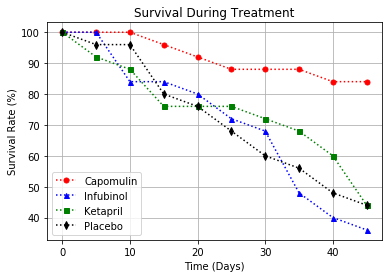

In [17]:
plt.grid()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.plot(x_cap_sr, y_cap_sr, color="red", label="Capomulin", marker="o", markersize = 5, linestyle= 'dotted')
plt.plot(x_inf_sr, y_inf_sr, color="blue", label="Infubinol", marker="^", markersize = 5, linestyle= 'dotted')
plt.plot(x_ket_sr, y_ket_sr, color="green", label="Ketapril", marker="s", markersize = 5, linestyle= 'dotted')
plt.plot(x_pla_sr, y_pla_sr, color="black", label="Placebo", marker="d", markersize = 5, linestyle= 'dotted')
plt.legend(loc="lower left")
plt.savefig("../Images/SurvivalDuringTreatment.png")
plt.show()

## Summary Bar Graph

In [18]:
drug_types = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]

Drug = []
Change = []

for drug in drug_types:

    drug_effect= mean_tumor_volume.loc[mouse_count['Drug']== drug].reset_index(drop=True)
    drug_effect_start= drug_effect.loc[0]['Tumor Volume (mm3)']  
    drug_effect['Tumor Start']=drug_effect_start
    drug_change = ((drug_effect.loc[9]['Tumor Volume (mm3)'] - drug_effect.loc[0]['Tumor Volume (mm3)'])/drug_effect.loc[0]['Tumor Volume (mm3)']) *100
    Drug.append(drug)
    Change.append(drug_change)

In [19]:
drug_dict = {
    "Drug": Drug,
    "Change": Change
}
drug_data = pd.DataFrame(drug_dict)
drug_data

,Drug,Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


In [20]:
drug_types = ["Capomulin","Infubinol","Ketapril","Placebo"]

Drug_new = []
Change_new = []

for drug in drug_types:

    drug_effect= mean_tumor_volume.loc[mouse_count['Drug']== drug].reset_index(drop=True)
    drug_effect_start= drug_effect.loc[0]['Tumor Volume (mm3)']  
    drug_effect['Tumor Start']=drug_effect_start
    drug_change = ((drug_effect.loc[9]['Tumor Volume (mm3)'] - drug_effect.loc[0]['Tumor Volume (mm3)'])/drug_effect.loc[0]['Tumor Volume (mm3)'])*100
    Drug_new.append(drug)
    Change_new.append(drug_change)
    
drug_dict_new = {
    "Drug_New": Drug_new,
    "Change_New": Change_new
}
drug_data_new = pd.DataFrame(drug_dict_new)

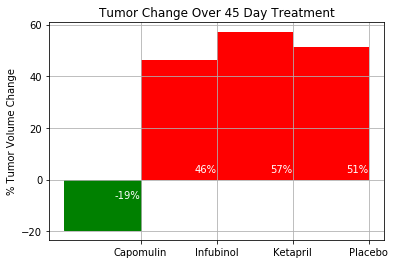

In [21]:
drug_data_new
x_axis_bar = drug_data_new["Drug_New"]
y_axis_bar = drug_data_new["Change_New"]
fig, ax = plt.subplots()
plt.grid()
ax.set_yticks([-20, 0, 20, 40, 60])
barlist=plt.bar(x_axis_bar, y_axis_bar, color='r', align="edge", width=-1)
barlist[0].set_color('g')
for a,b in zip(x_axis_bar, y_axis_bar):
    if (b > 0) == True:
        ax.text(a, 2, (str(round(b))+'%'),horizontalalignment='right',verticalalignment='bottom', color = 'white') 
    else: 
        ax.text(a, -8, (str(round(b))+'%'),horizontalalignment='right',verticalalignment='bottom', color = 'white') 
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.savefig("../Images/TumorChangeOver45DayTreatment.png")
plt.show()